In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets, Button
from math import pi,cos

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


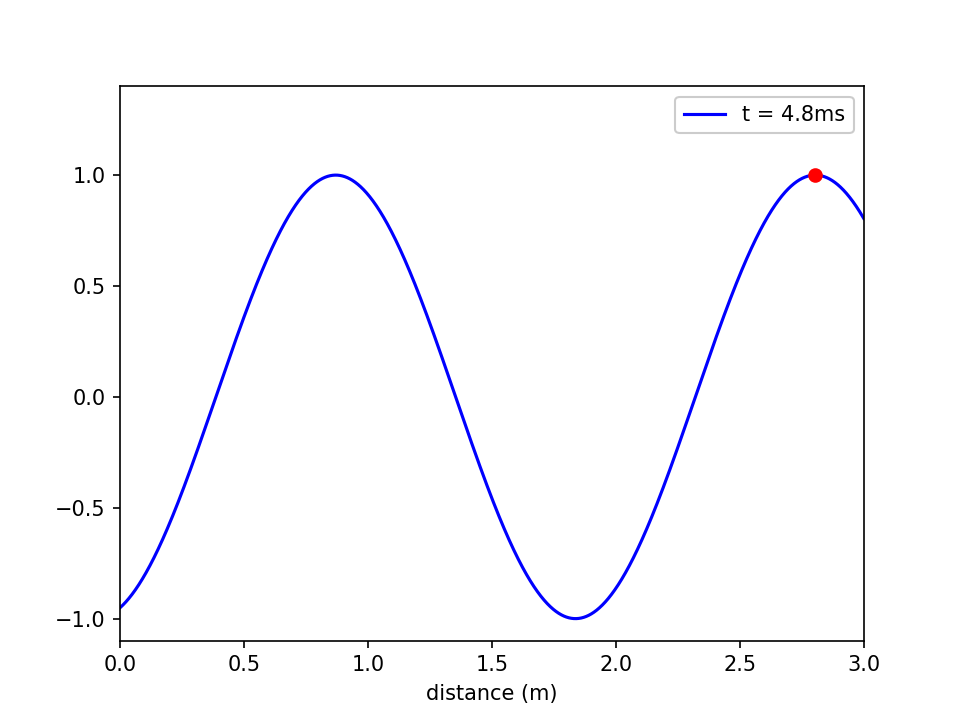

interactive(children=(IntSlider(value=340, description='celerite', max=600, min=220, step=40), Output()), _dom…

interactive(children=(IntSlider(value=1000, description='frequence', max=2000, min=200, step=100), Output()), …

In [6]:
#Création de la liste des valeurs de x


#On crée la figure une fois puis on la modifie régulièrement dans le temps
fig = plt.figure("Essai 1")
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim(0,3)
ax1.set_ylim(-1.1,1.4)
fig.show()

xmax=3.
x=[i*xmax/3000. for i in range(3000)]



@interact(celerite=(220,600,40))  
def defC(celerite=340):
    global c,ig,ir
    c = celerite
    ig=500
    ir=500

defC()

@interact(frequence = (200,2000,100))
def defT(frequence=1000):
    global T,dt,ig,ir
    ig=500
    ir=500
    T = 1/frequence
    dt = T/20.

defT()


def f(x,t,c,T):
    return cos(2*pi*(t/T-x/(c*T)))

    
def anime(i):
    global c,T,dt,xmax,ig,ir,x,ax1,fig  
    if ir > i:
        ir = i
        ig = i
       
 
    #Création de la liste des valeurs de y à l'instant i*dt
    y=[]
    for j in range(3000):
        y.append(f(x[j],i*dt,c,T))

    #On efface le graphique précédent
    ax1.clear() 
    ax1.set_xlim(0,xmax)
    ax1.set_ylim(-1.1,1.4)
    #On trace le nouveau graphique
    ax1.plot(x,y,"blue",label="t = {:.1f}ms".format(1000*i*dt))
    
    #Si le point rouge sort de l'écran, il repart à gauche et on synchronise avec le vert
    if c*(i-ir)*dt>xmax:
        ir=i
        ig=ir

    #On trace les points
    ax1.plot([c*(i-ir)*dt],[f(c*(i-ir)*dt,i*dt,c,T)],"o",color="red")
    if c*(i-ig)*dt+c*T<xmax:
        ax1.plot([c*(i-ig)*dt+c*T],[f(c*(i-ig)*dt+c*T,i*dt,c,T)],"o",color="green")

    #On ajoute la légende et la grandeur sur l'axe des abscisses
    ax1.legend(loc='upper right',framealpha=1.)
    ax1.set_xlabel("distance (m)")

simulation=animation.FuncAnimation(fig,anime,interval=200,frames=200) #appelle la fonction anime toutes les 50 ms avec un indice i de plus en plus grand